<a href="https://colab.research.google.com/github/Arjun-RY/Projects/blob/task/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10

In [104]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [96]:
# Drop the row ID since it is a irrelevant field
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train = train.drop('ID', axis=1) 
test = pd.read_csv('testKNN.txt', header=None)
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = test.drop('ID', axis=1)

In [99]:
# Standardize training and testing sets(Don't standardize the categories)
def standardize (df):
    for col in df.columns:
        if col != "Type of glass":
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

train = standardize(train)
test = standardize(test)

In [105]:
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean) # Square Euclidean distance model , K=8
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock) # Manhattan distance model , K=8
x_train = train.drop(["Type of glass"], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("Type of glass", axis=1) 
y_test = test["Type of glass"]
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})

In [107]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}% \n\n'.format(round(100*manhattan_count/len(df), 2)))
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))

Manhattan Accuracy: 66.67% 


Square Euclidean Accuracy: 61.11%


# Assignment 11 - Data Processing



In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [1]:
import numpy as np
import pandas as pd

**Step 2: Importing dataset**

In [2]:
dataset = pd.read_csv('Data.csv')

**Step 3: Handling the missing data**

In [5]:
from sklearn.impute import SimpleImputer

X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 3].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])

**Step 4: Encoding categorical data**

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])

**Step 5: Creating a dummy variable**

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

**Step 6: Splitting the datasets into training sets and Test sets**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

**Step 7: Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [12]:
print(X_train)
print()
print(X_test)

[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]

[[ 0.  0.  0. -1. -1.]
 [ 0.  0.  0.  1.  1.]]


# Assignment 12 - Logistic Regression

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [86]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [87]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

**Step 3 | Prediction**

In [90]:
Y_pred = classifier.predict(X_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[57,  1],
       [ 5, 17]])

**Visualization**

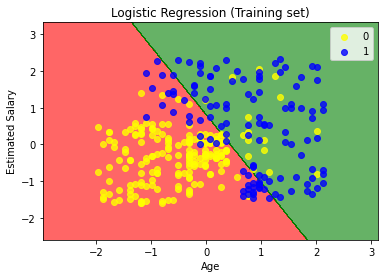

In [93]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

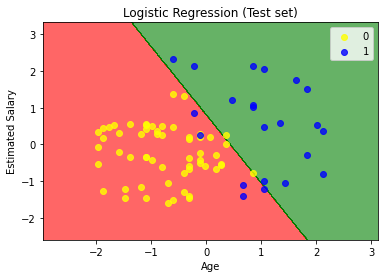

In [94]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test,Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Assignment 13 - KNN

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [26]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [27]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [31]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[64,  4],
       [ 3, 29]])

# Assignment 14 - SVM

In [33]:
#Social_Network_Ads.csv

**Importing the libraries**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [69]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [70]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting SVM to the Training set**

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [73]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[66,  2],
       [ 8, 24]])

**Visualising the Training set results**

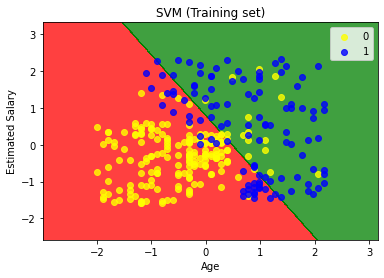

In [75]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

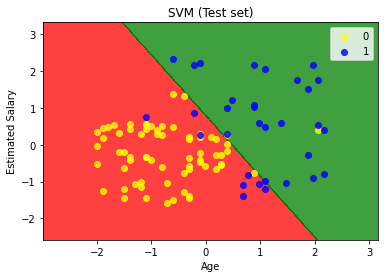

In [76]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Assignment 15 - Decision Tree

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [54]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [55]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [58]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[62,  6],
       [ 3, 29]])

**Visualising the Training set results**

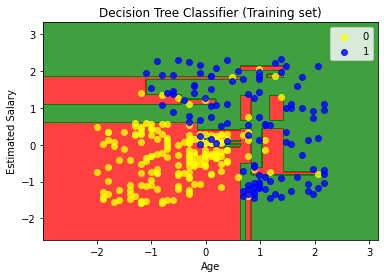

In [66]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

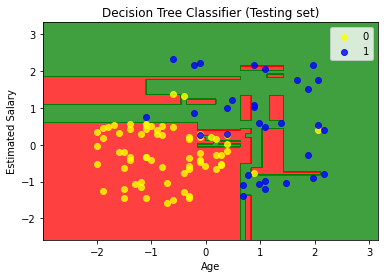

In [67]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Decision Tree Classifier (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Assignment 16 - Random Forest

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting Random Forest to the Training set**

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Predicting the Test set results**

In [79]:
Y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[63,  5],
       [ 4, 28]])

**Visualising the Training set results**

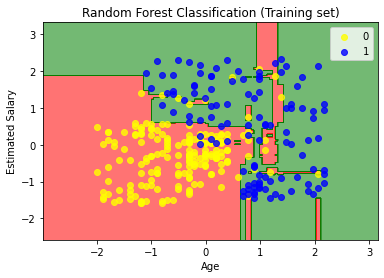

In [82]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

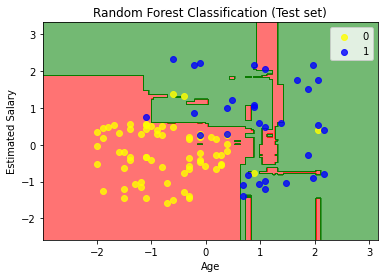

In [84]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], alpha=0.8, color=ListedColormap(('yellow', 'blue'))(i), label=j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()